In [ ]:
#!pip3 install qiskit ipywidgets

In [ ]:
#!pip3 install pylatexenc

## Qubit Tunggal

In [1]:
import numpy as np
import math
from math import sqrt
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit import BasicAer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import transpile

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36488\1742237787.py:7: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import BasicAer


c:\Users\LENOVO\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


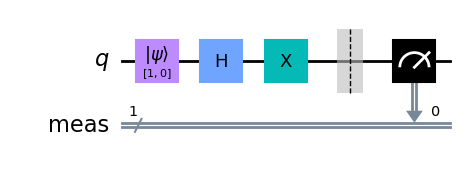

In [2]:
# Define state |psi>
#initial_state = [1/sqrt(5), 2/sqrt(5)]   # jumlah kuadrat amplitudo harus = 1
#initial_state = [3/5, 4/5]               # Psi_0 = 3/5|0> + 4/5|1> 
#initial_state = [sqrt(0.4), sqrt(0.6)]    # Psi_0 = 0.4|0> + 0.6|1>
#initial_state = [1/sqrt(2), 1/sqrt(2)]   
initial_state = [1, 0]                   # Psi_0 = |0>

# Redefine the quantum circuit
qc = QuantumCircuit(1)                    # membuat quantum circuit 1-qubit

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0)           # inisialisasi pada  qubit ke-0; q0 = Psi_0 = |0>
#print('State Qubit awal')
#display(plot_bloch_multivector(qc))
qc.h(0)                                   # H(q0)  
qc.x(0)                                   # X(q0)
print()
#print('State Qubit hasil operasi')
#display(plot_bloch_multivector(qc))
qc.measure_all()                          # Pengukuran State Qubit akhir
qc.draw(output="mpl")                     # Menggambar Quantum Circuit

In [3]:
simulator = Aer.get_backend("aer_simulator") # simulasi kuantum dilakukan di komputer lokal
qc.save_statevector()
tqc = transpile(qc, simulator)
job = simulator.run(tqc)
result = job.result()
statevector = result.get_statevector(tqc, 4)
print(statevector)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36488\2882070272.py:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend("aer_simulator") # simulasi kuantum dilakukan di komputer lokal


{'0': 479, '1': 521}


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36488\2906261942.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, simulator, shots=1000)


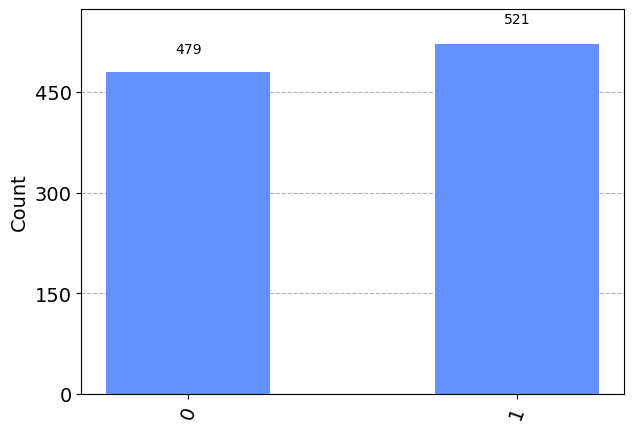

In [4]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
# Return counts
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)

### Multiple Qubit

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36488\1768301200.py:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.id as direct replacement.
  qc.i(2)                                 # I(q2)
c:\Users\LENOVO\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


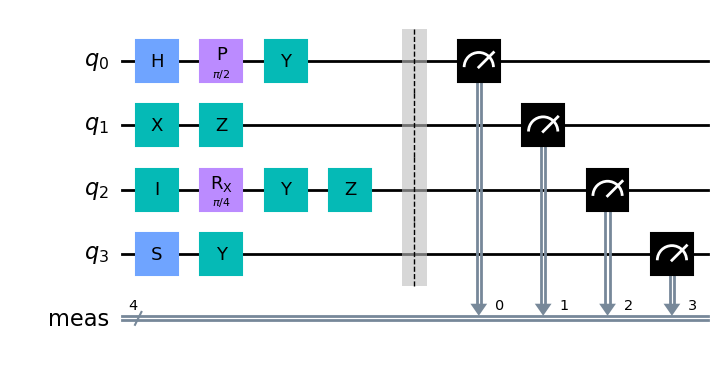

In [5]:
qc = QuantumCircuit(4)
qc.h(0)                                 # H(q0)
qc.i(2)                                 # I(q2)
qc.p(math.pi/2,0)                       # P(q0)
qc.rx(math.pi/4,2)                      # Rx(q2)
qc.s(3)                                 # S(q3)
qc.x(1)                                 # X(q1)
qc.y([0,2,3])                           # Y(q0) Y(q2) Y(q3)
qc.z([1,2])                             # Z(q1) Z(z2)
#print('State Qubit hasil operasi')
#display(plot_bloch_multivector(qc))
qc.measure_all()                          # Pengukuran State Qubit
display(qc.draw(output="mpl"))            # Menggambar Quantum Circuit

In [6]:
simulator = Aer.get_backend("aer_simulator")
qc.save_statevector()
tqc = transpile(qc, simulator)
job = simulator.run(tqc)
result = job.result()
statevector = result.get_statevector(tqc, 4)
print(statevector)

Statevector([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
             -1.+0.j,  0.+0.j],
            dims=(2, 2, 2, 2))


{'1111': 444, '1110': 414, '1011': 73, '1010': 69}


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36488\2906261942.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, simulator, shots=1000)


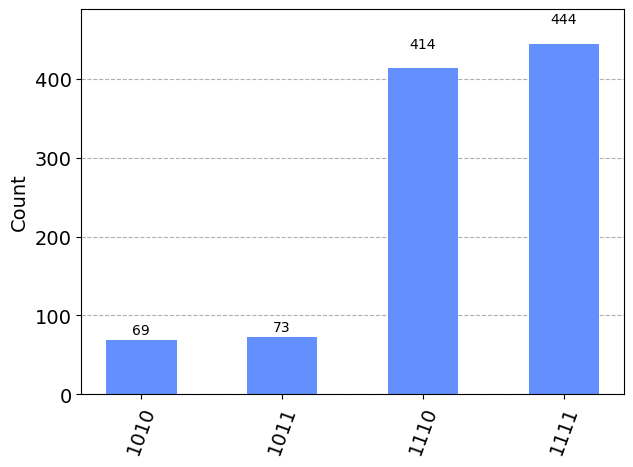

In [7]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
# Return counts
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)

### Multiple Qubit: Entanglement

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36488\1513636314.py:8: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(2,3)
c:\Users\LENOVO\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


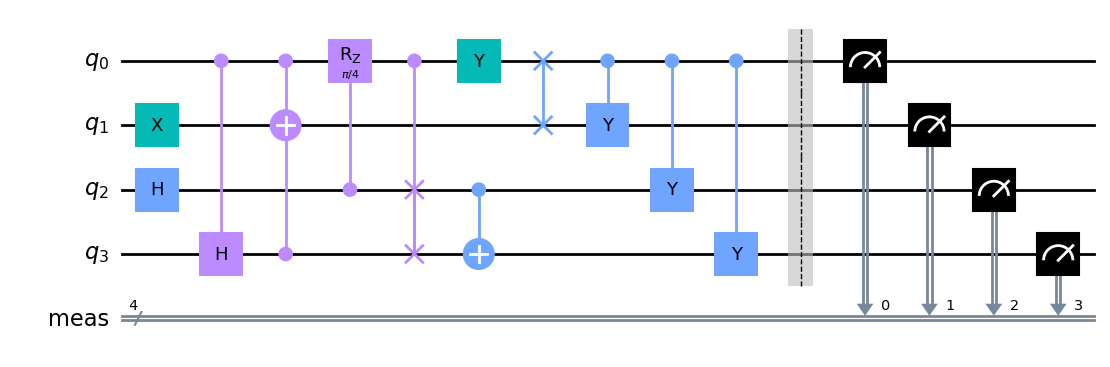

In [8]:
qc = QuantumCircuit(4)
qc.h(2)                              # H(q2)
qc.ch(0,3)                           # Control H, q0=kontrol    q3 = target
qc.x(1)                              # X(q1)
qc.ccx(3,0,1)                        # Control-control X, q0 dan q3 = kontrol      q1 = target
qc.crz(math.pi/4,2,0)                # Control Rz,               q2 = kontrol      q0 = target
qc.cswap(0,2,3)                      # Control swap,       q0 = kontrol            q2 dan q3 melakukan swap
qc.cnot(2,3)
qc.y(0)
qc.swap(0,1)
qc.cy(0,[1,2,3])                     #Control Y,  q0 = kontrol         q1,q2,q3 = target
#print('State Qubit hasil operasi')
#display(plot_bloch_multivector(qc))
qc.measure_all()                          # Pengukuran State Qubit
display(qc.draw(output="mpl"))            # Menggambar Quantum Circuit

In [9]:
simulator = Aer.get_backend("aer_simulator")
qc.save_statevector()
tqc = transpile(qc, simulator)
job = simulator.run(tqc)
result = job.result()
statevector = result.get_statevector(tqc, 4)
print(statevector)

Statevector([ 0.    +0.j    , -0.9239+0.3827j,  0.    +0.j    ,
             -0.    +0.j    ,  0.    +0.j    ,  0.    +0.j    ,
              0.    +0.j    ,  0.    +0.j    ,  0.    +0.j    ,
              0.    +0.j    ,  0.    +0.j    ,  0.    +0.j    ,
              0.    +0.j    , -0.    +0.j    ,  0.    +0.j    ,
              0.    +0.j    ],
            dims=(2, 2, 2, 2))


{'1101': 490, '0001': 510}


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36488\2906261942.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, simulator, shots=1000)


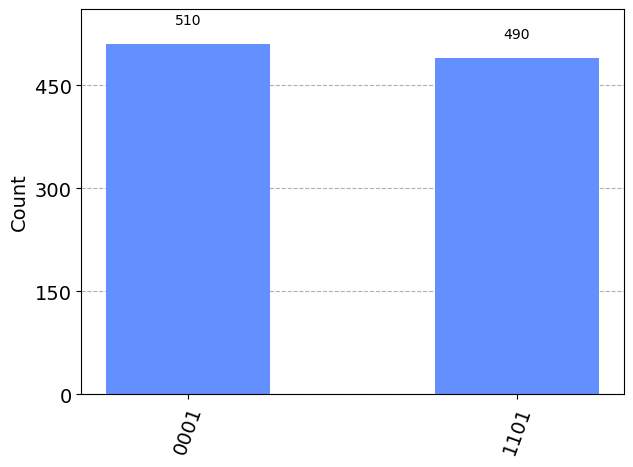

In [10]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
# Return counts
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)